In [3]:
%load_ext autoreload
%autoreload 2

This notebook performs an exploratory analysis of mouse movement data from two sources:

Our Bot — automated mouse activity generated by our own bot system.

Our User — natural mouse movement data collected from a real human user.

The goal is to visually and statistically compare how bots and humans move the mouse, generating insights useful for behavioral biometrics and bot detection systems.

In [4]:
import sys
import os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

In [5]:
from data_loader import load_folder
import seaborn as sns
import matplotlib.pyplot as plt

## Our data bot

In [6]:
df, _ = load_folder("D:/Files/GitHub/DL-BotGuard/data/raw/our_bot/v1/mouse")

In [7]:
df["process_name"].value_counts()

process_name
chrome.exe             3479
Code.exe               3097
WindowsTerminal.exe    1033
explorer.exe            542
Name: count, dtype: int64

C:\Users\dobbi\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


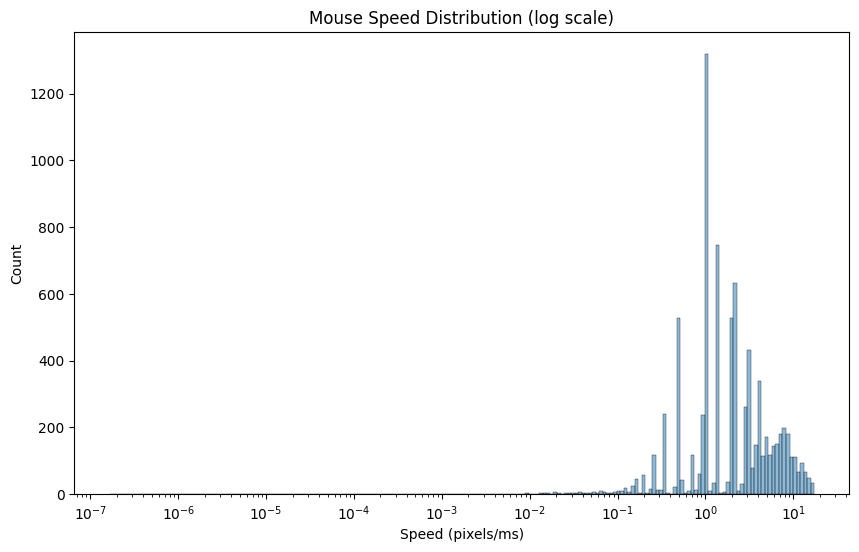

In [8]:
mouse_df = df[df["type"] == "mouse"]

plt.figure(figsize=(10,6))
sns.histplot(mouse_df["speed"], bins=200, kde=True, log_scale=True)
plt.title("Mouse Speed Distribution (log scale)")
plt.xlabel("Speed (pixels/ms)")
plt.show()


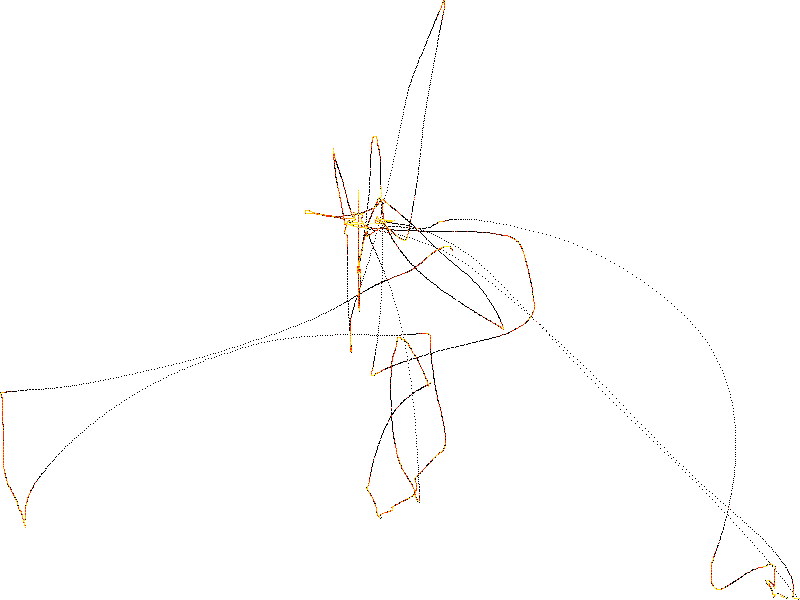

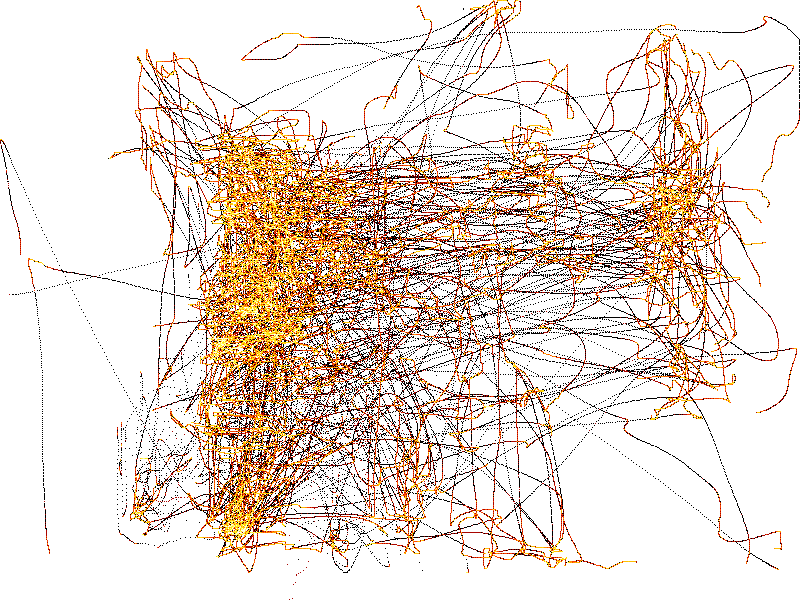

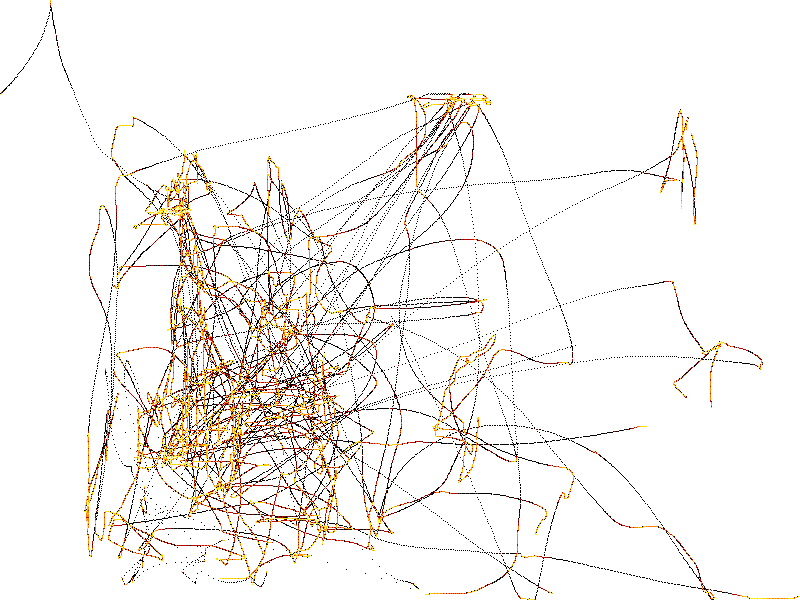

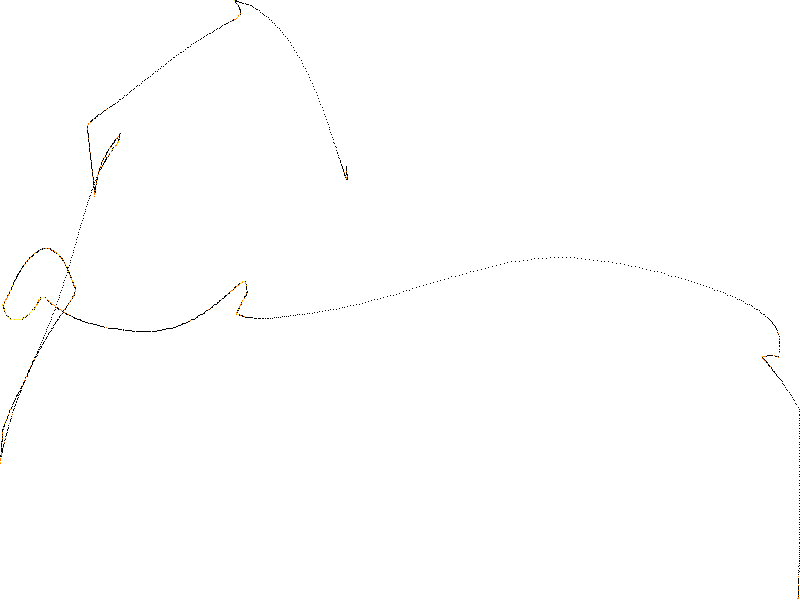

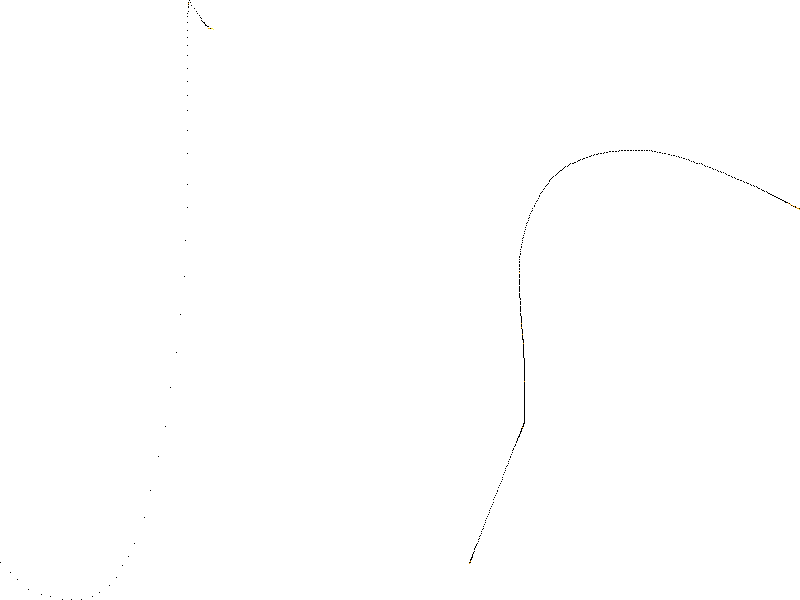

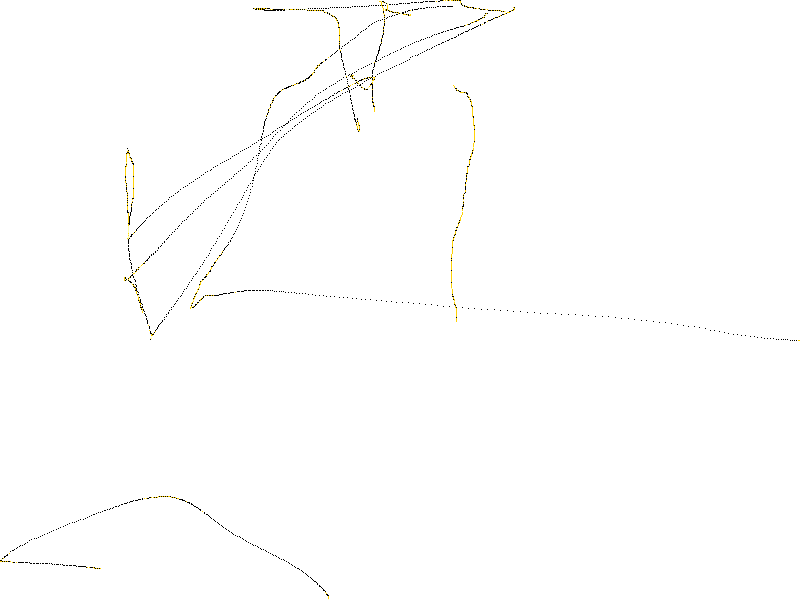

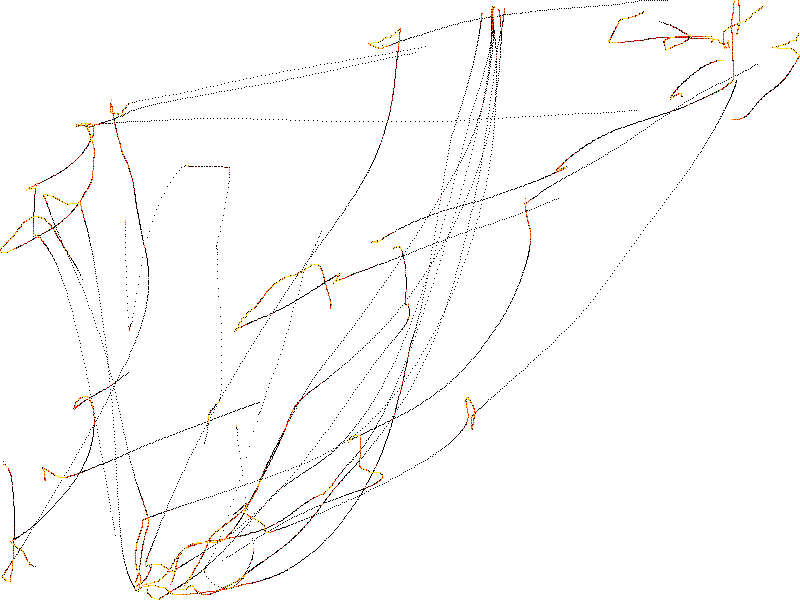

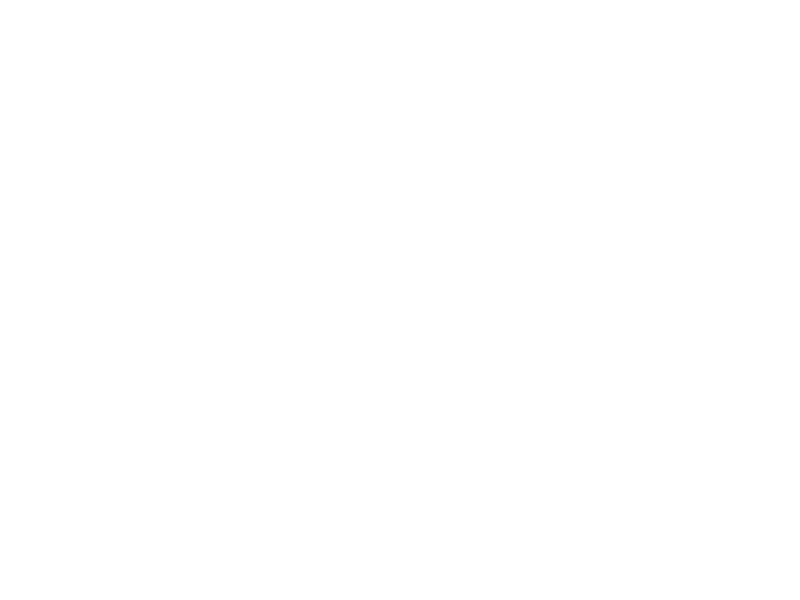

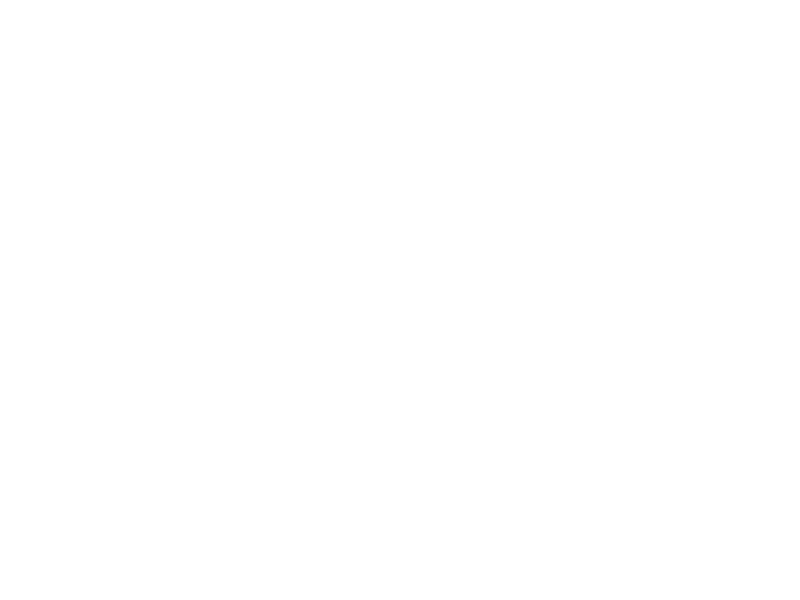

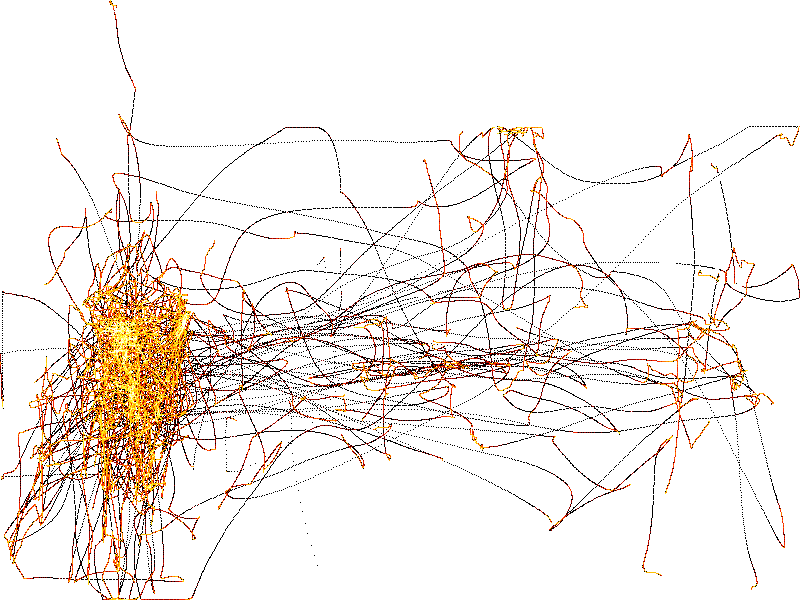

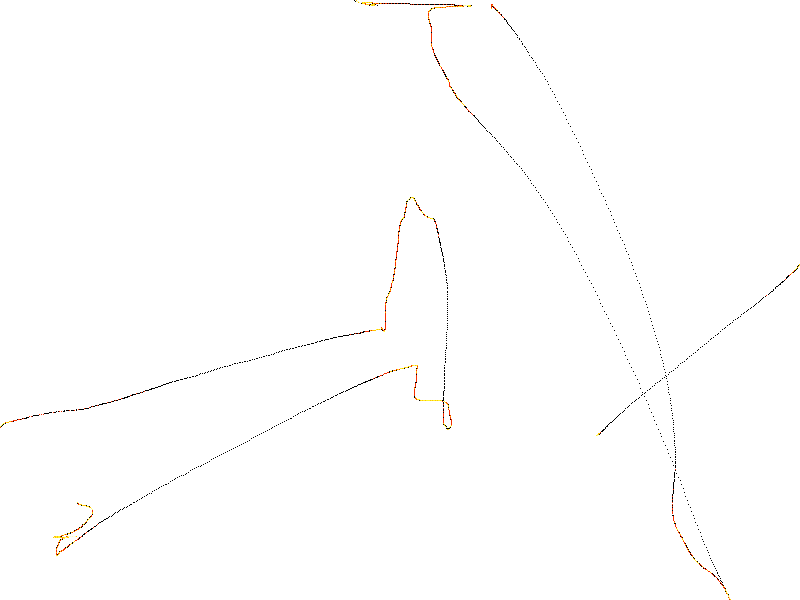

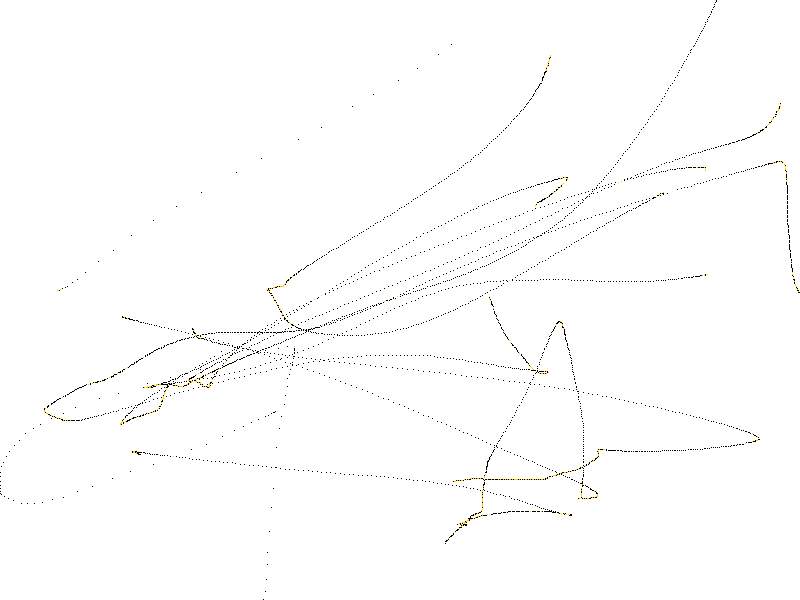

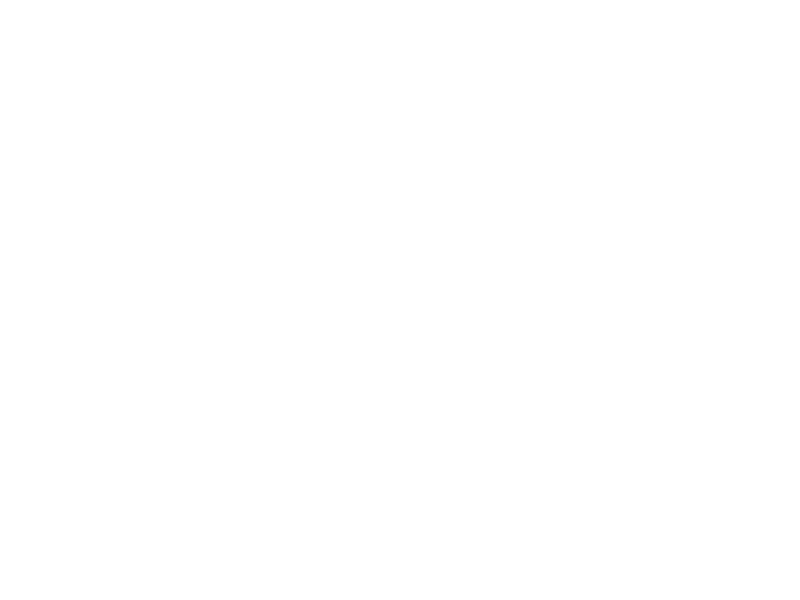

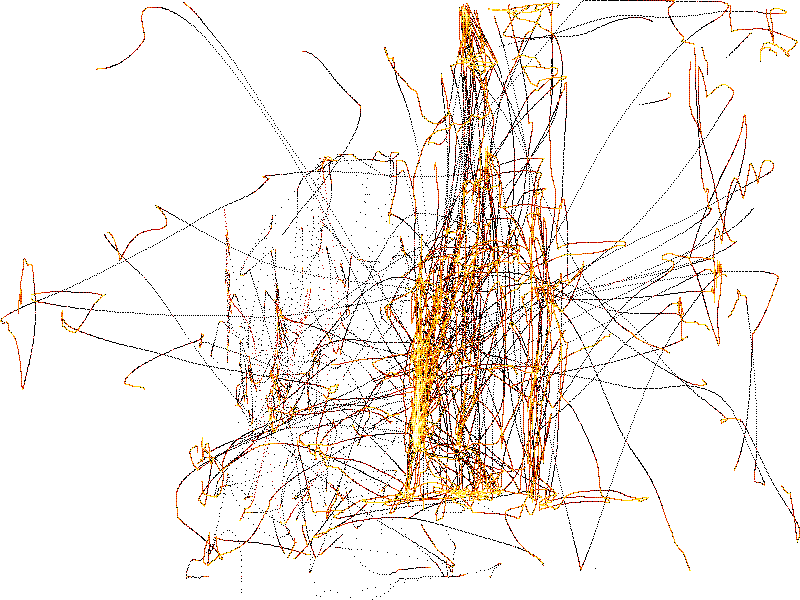

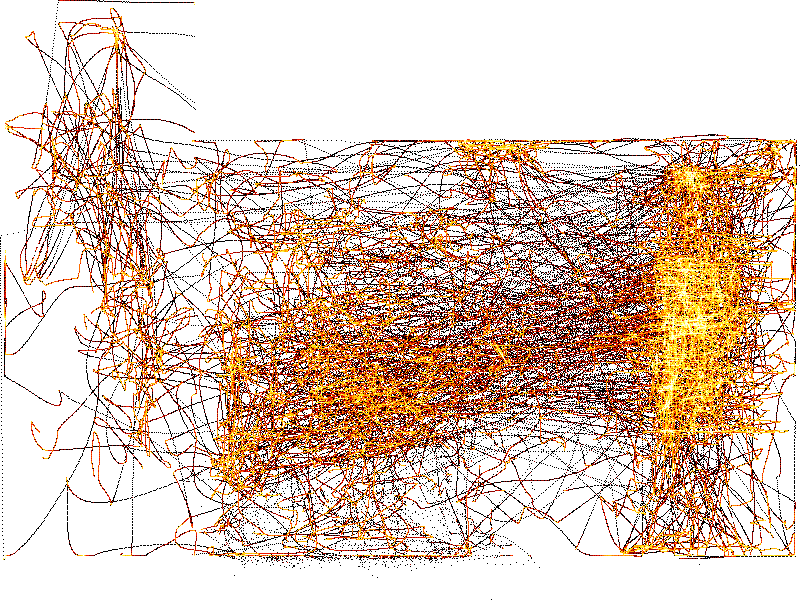

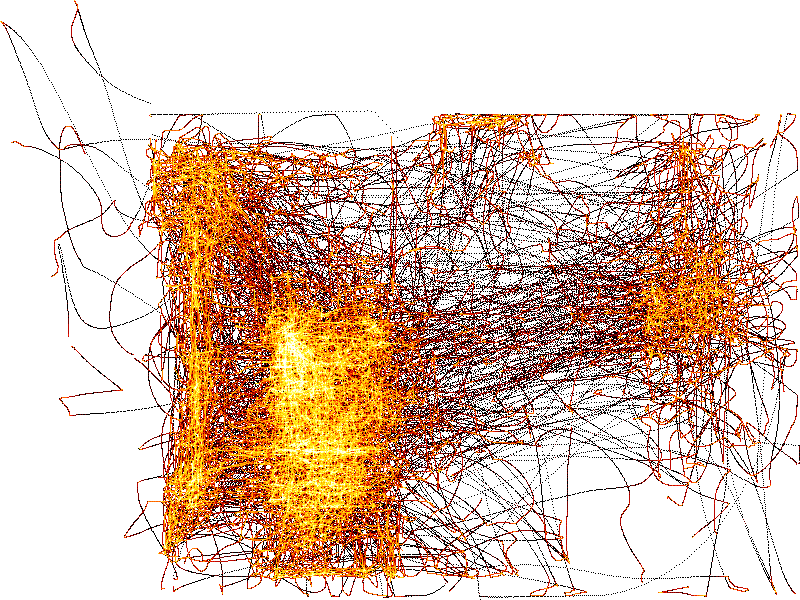

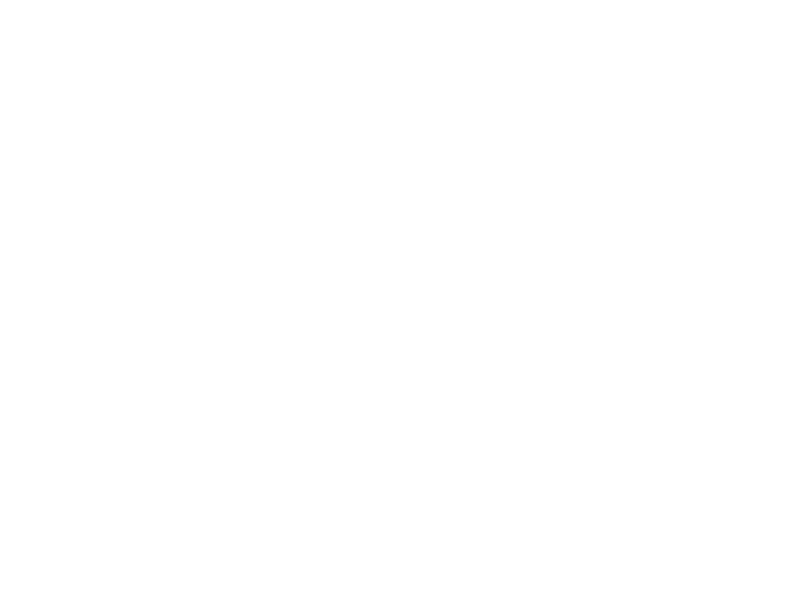

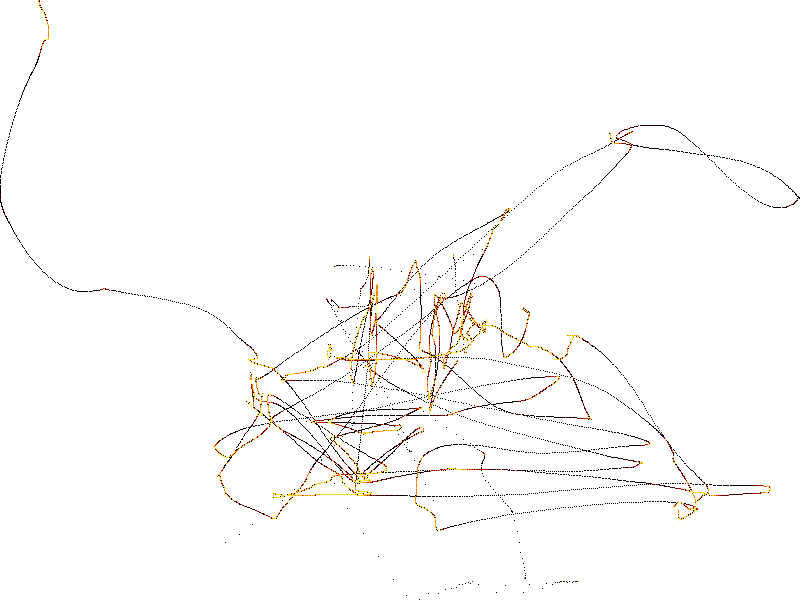

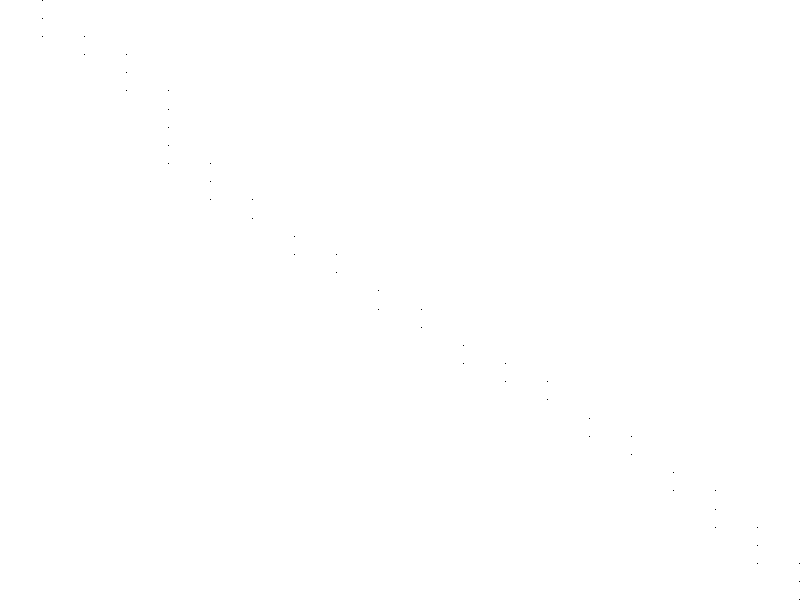

In [13]:
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd
import colorcet as cc
import numpy as np

def plot_datashader_heatmap(d, title):
    cvs = ds.Canvas(plot_width=800, plot_height=600)
    agg = cvs.points(d, 'x', 'y')
    img = tf.shade(agg, cmap=cc.fire)
    tf.set_background(img, "black").to_pil().save(f"{title}.png")
    display(img)

for app, d in df[df["type"]=="mouse"].groupby("process_name"):
    plot_datashader_heatmap(d, f"Bot heatmap for {app}")



## Our data user

In [10]:
df, _ = load_folder("D:/Files/GitHub/DL-BotGuard/data/raw/our/v1/mouse")

C:\Users\dobbi\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


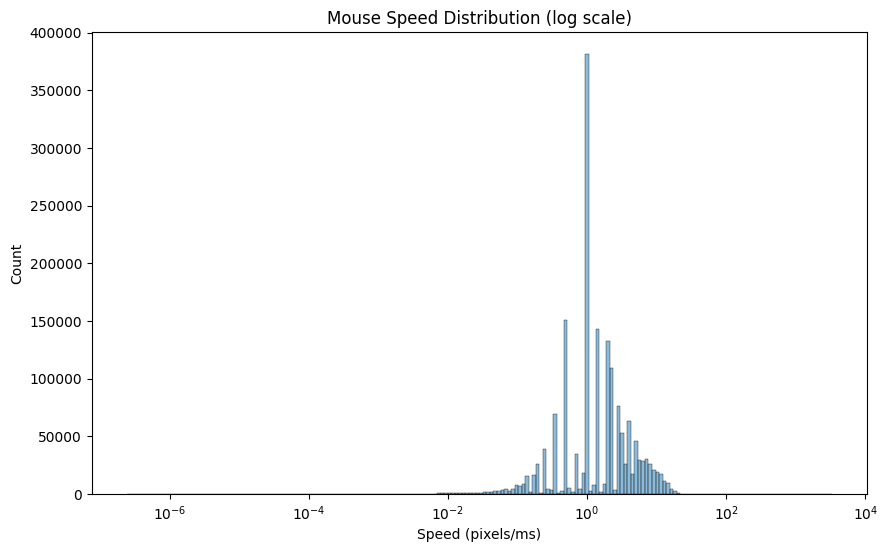

In [11]:
mouse_df = df[df["type"] == "mouse"]

plt.figure(figsize=(10,6))
sns.histplot(mouse_df["speed"], bins=200, kde=True, log_scale=True)
plt.title("Mouse Speed Distribution (log scale)")
plt.xlabel("Speed (pixels/ms)")
plt.show()


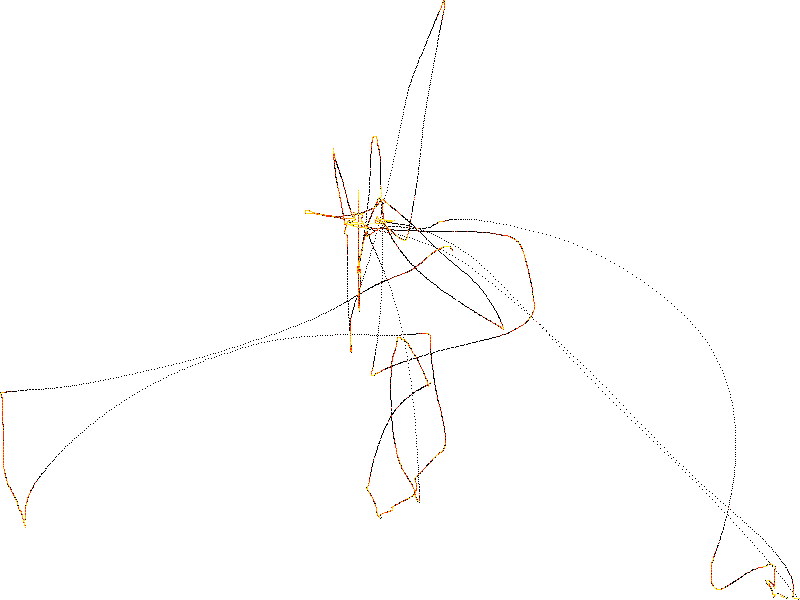

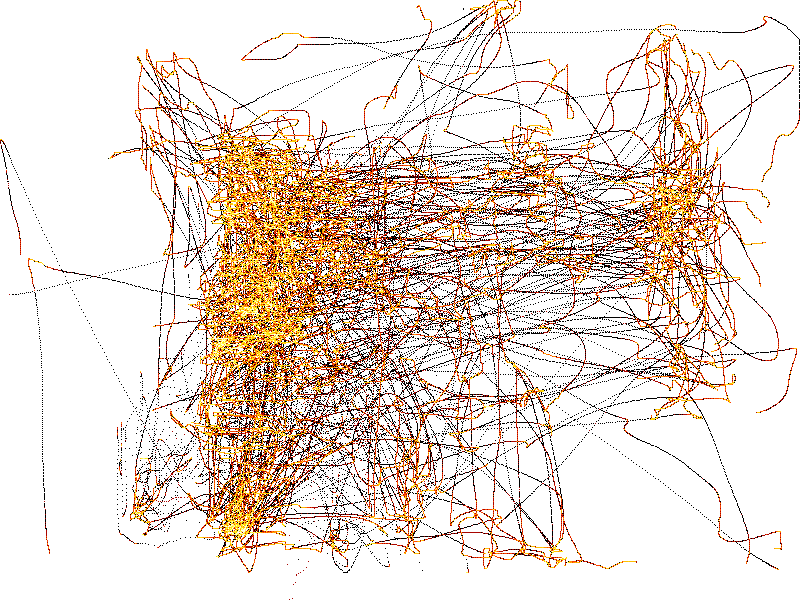

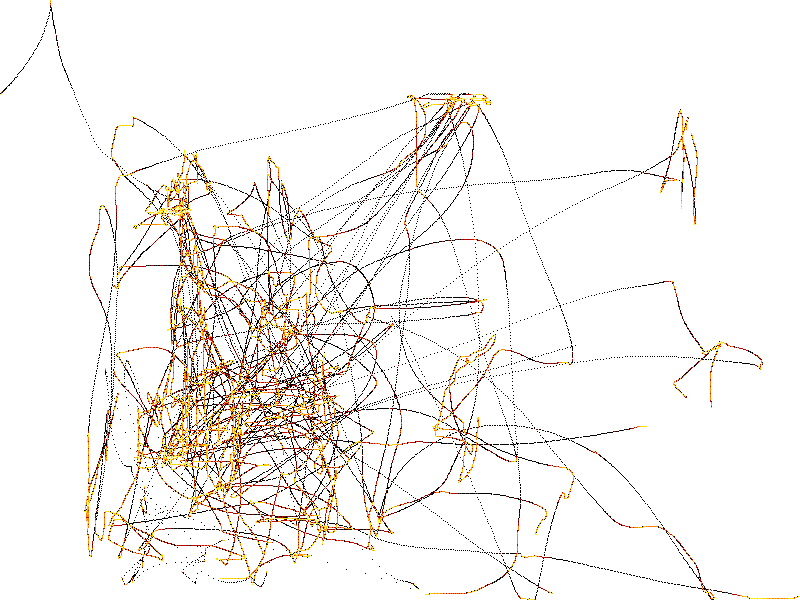

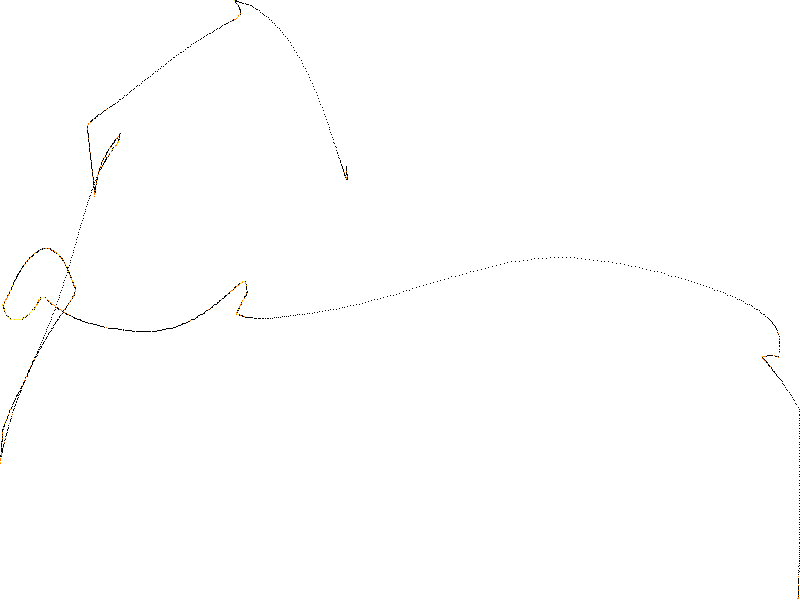

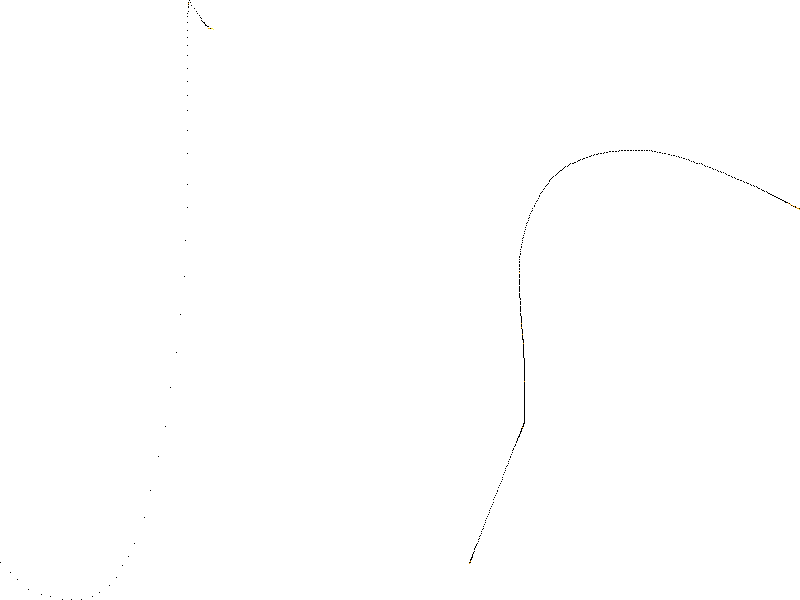

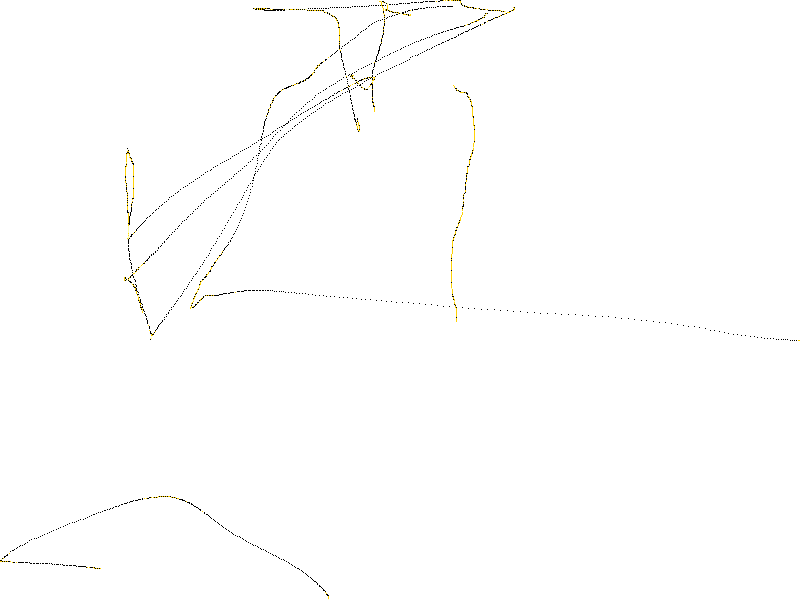

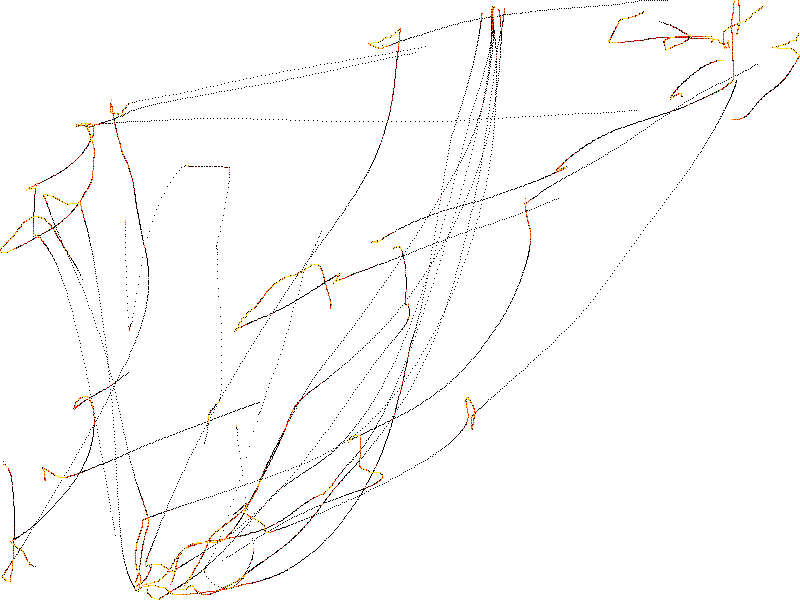

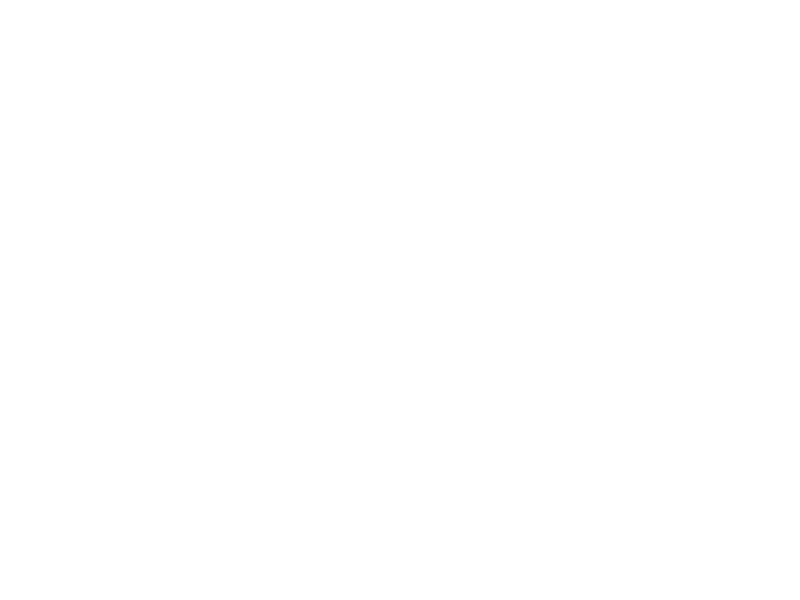

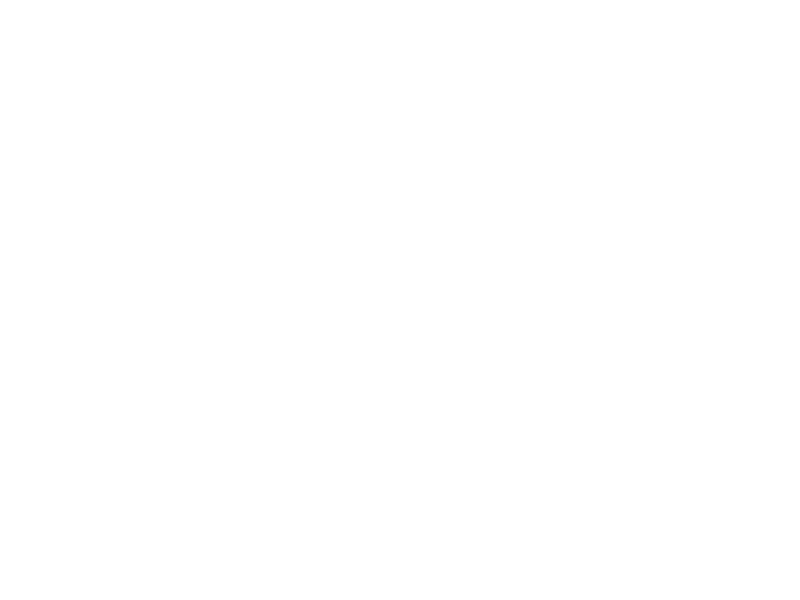

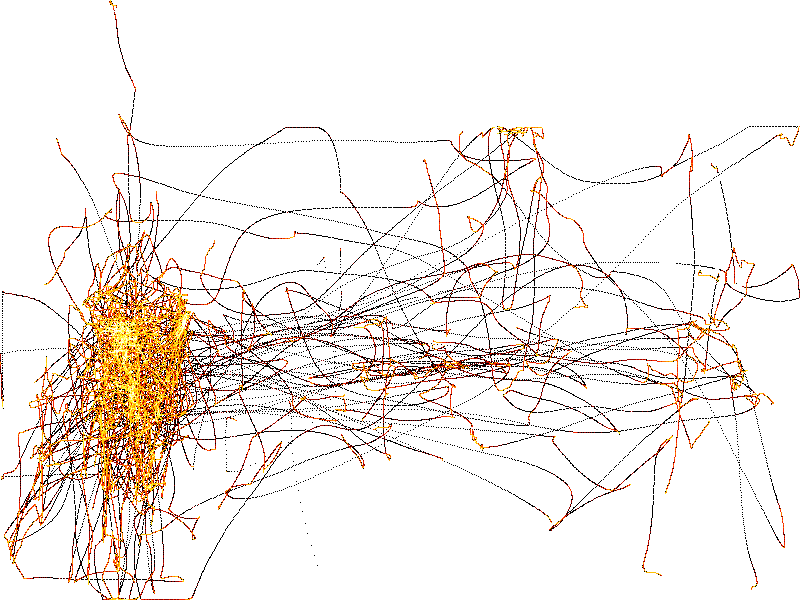

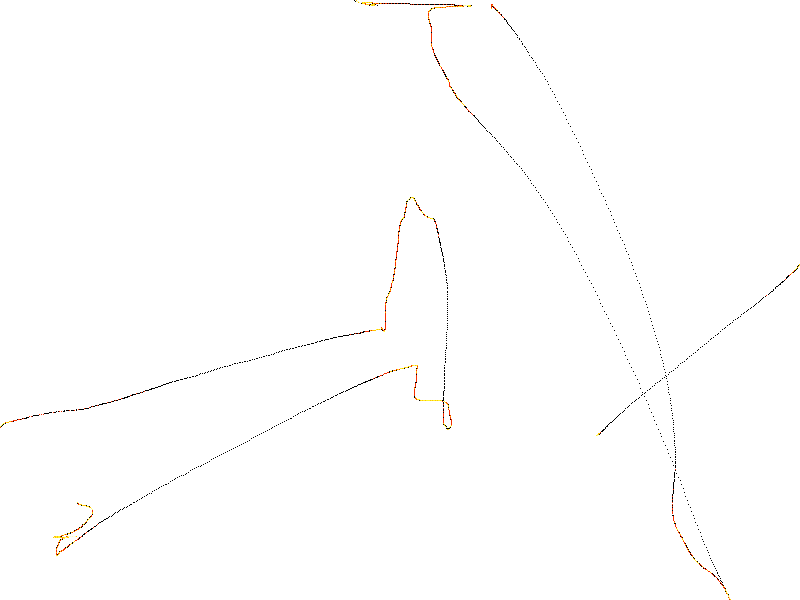

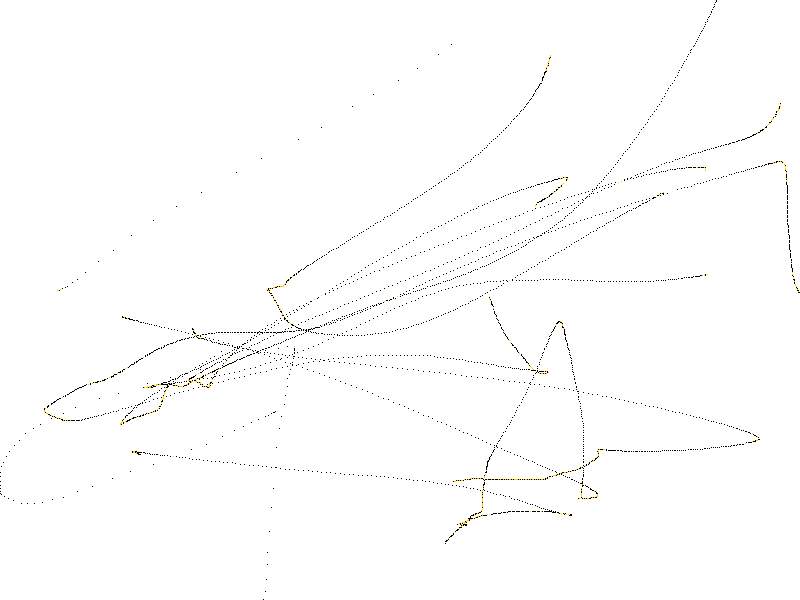

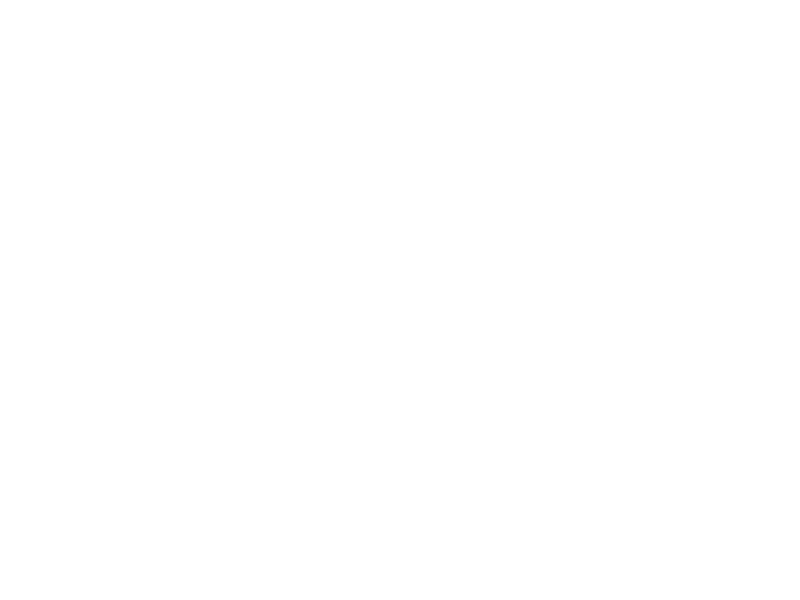

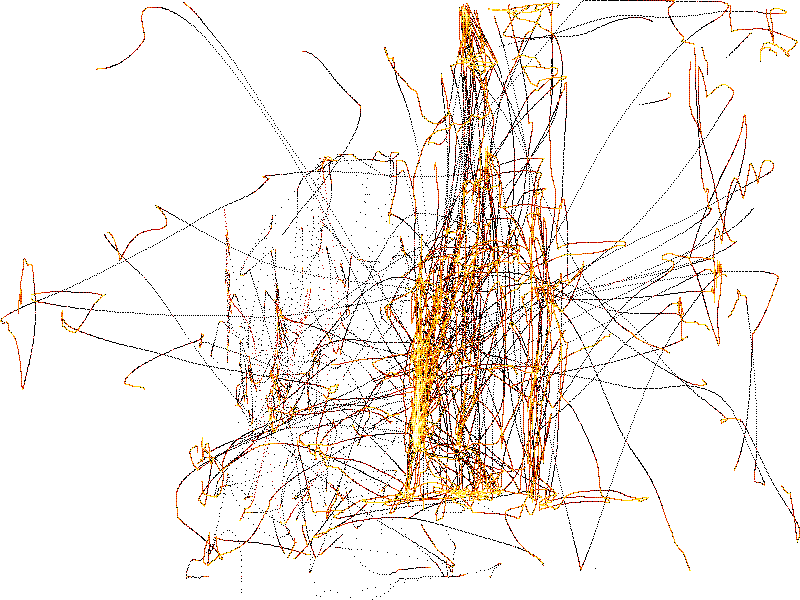

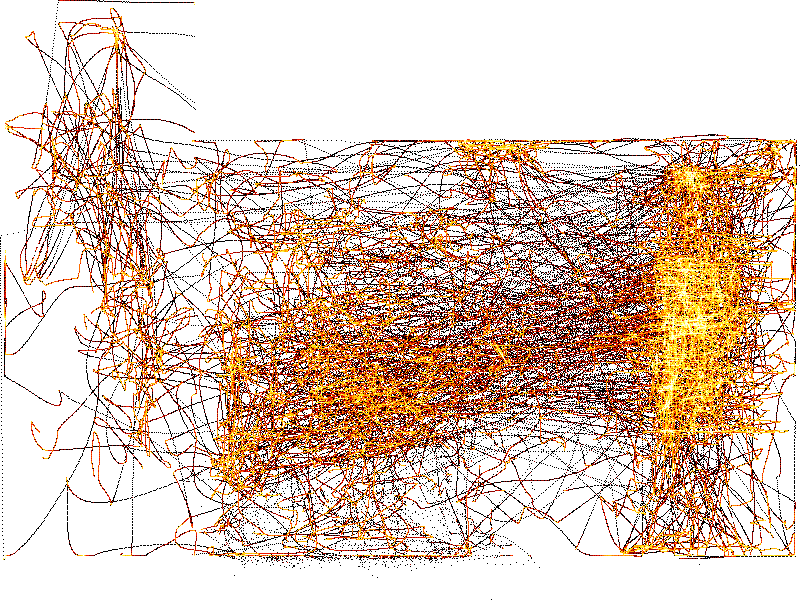

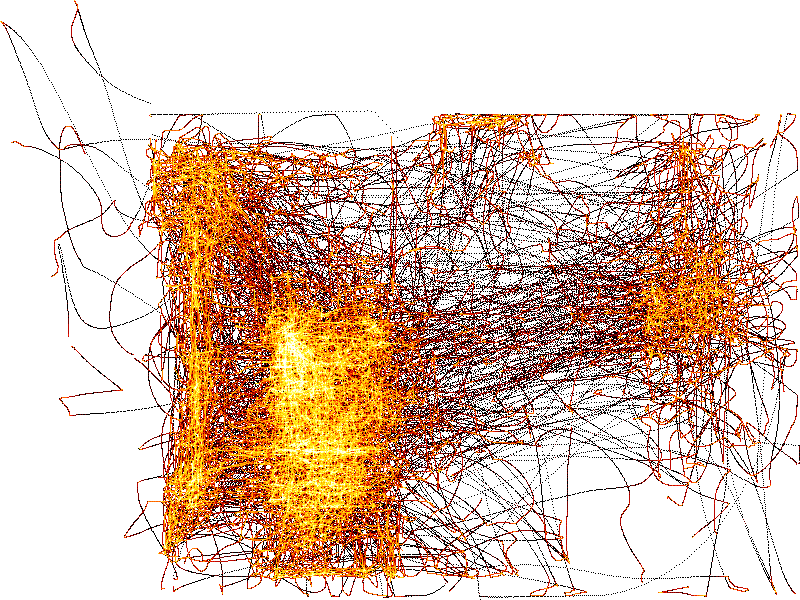

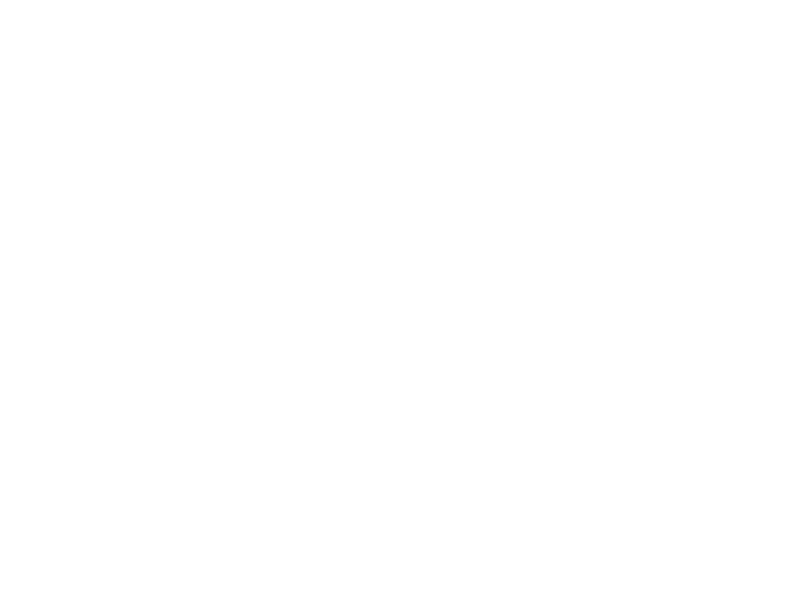

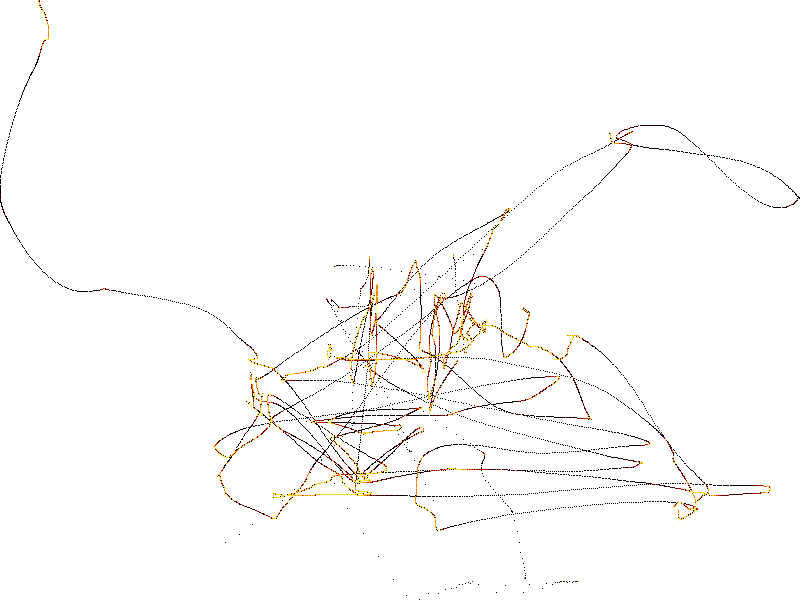

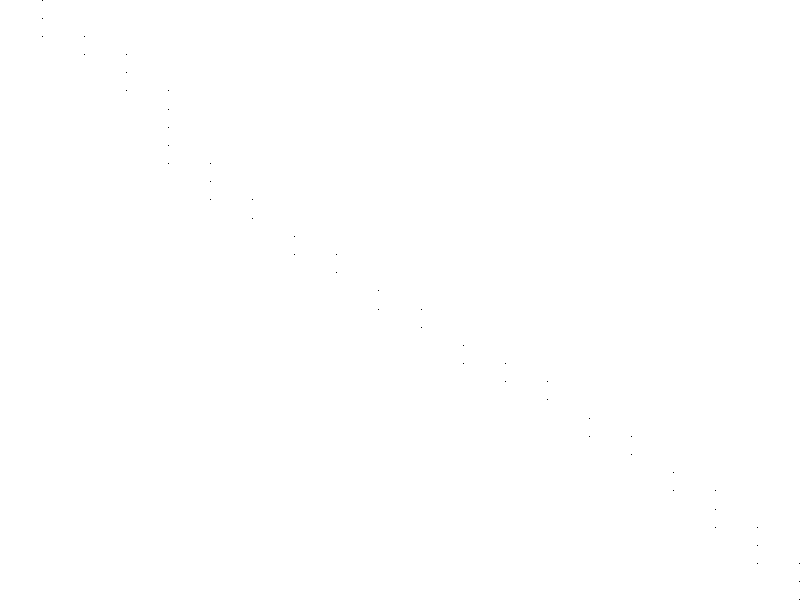

In [14]:
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd
import colorcet as cc
import numpy as np

def plot_datashader_heatmap(d, title):
    cvs = ds.Canvas(plot_width=800, plot_height=600)
    agg = cvs.points(d, 'x', 'y')
    img = tf.shade(agg, cmap=cc.fire)
    tf.set_background(img, "black").to_pil().save(f"{title}.png")
    display(img)

for app, d in df[df["type"]=="mouse"].groupby("process_name"):
    plot_datashader_heatmap(d, f"User heatmap for {app}")

